In [74]:
import pandas as pd
nhl_df = pd.read_csv('C:/Users/Martin/Downloads/mvp_nhl.csv')

In [75]:
nhl_df

,game_id,attendance,period,home_team,away_team,home_points,away_points,pdo,fenwick_pct,corsi_pct,...,on_ice_shots_for,fenwick_total,fenwick_against,fenwick_for,corsi_total,corsi_against,corsi_for,away_pdo,away_fenwick_pct,away_corsi_pct
0,d4e6e4d6-4f54-417a-aad0-d31ef1f8e59a,18006.0,3.0,Rangers,Lightning,3,1,8.662,0.519,0.566,...,21.0,2.0,25.0,27.0,10.0,33.0,43.0,4.723,0.481,0.434
1,74862d16-c58e-48cd-9ac9-8bba7c38e5ce,18230.0,3.0,Kings,Golden Knights,3,4,10.922,0.441,0.410,...,28.0,-11.0,52.0,41.0,-22.0,72.0,50.0,8.700,0.559,0.590
2,0e98c1ac-2b1b-4ed1-ab70-62c5c8cdee59,18824.0,3.0,Hurricanes,Blue Jackets,4,1,10.269,0.610,0.627,...,37.0,23.0,41.0,64.0,34.0,50.0,84.0,4.007,0.390,0.373
3,5fdf470b-8cb9-4748-bae5-60fcd29de3b4,21105.0,3.0,Canadiens,Maple Leafs,4,3,18.306,0.483,0.456,...,18.0,-2.0,30.0,28.0,-8.0,49.0,41.0,10.226,0.517,0.544
4,c0a72838-2d41-4bd3-81cf-034a6a6fdafd,18573.0,3.0,Capitals,Bruins,2,5,6.533,0.561,0.553,...,27.0,8.0,29.0,37.0,10.0,42.0,52.0,17.643,0.439,0.447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,e3d2b4af-8305-44c1-9ec7-b7646af8f99e,16127.0,3.0,Ducks,Bruins,1,7,4.233,0.367,0.443,...,21.0,-21.0,50.0,29.0,-12.0,59.0,47.0,17.666,0.633,0.557
879,a9592132-6f36-4c37-ba13-b5a726379dff,11271.0,3.0,Sabres,Flyers,0,4,0.895,0.494,0.469,...,26.0,-1.0,39.0,38.0,-6.0,51.0,45.0,11.500,0.506,0.531
880,7707ff20-b985-4737-b3b1-97477760468d,13362.0,3.0,Senators,Predators,0,3,0.917,0.547,0.607,...,24.0,6.0,29.0,35.0,18.0,33.0,51.0,9.300,0.453,0.393
881,cdf9ed1b-1e81-4d71-a341-1b2eb13a75da,21105.0,3.0,Canadiens,Kraken,0,4,0.902,0.429,0.495,...,17.0,-9.0,36.0,27.0,-1.0,48.0,47.0,10.800,0.571,0.505


In [76]:
weight_by_season_end_standings= {'Rangers':8, 'Bruins':8, 'Stars':8, 'Canucks':8,'Avalanche':7,'Oilers':7,'Panthers':7,'Hurricanes':7,'Islanders':6,'Maple Leafs':6, 'Jets':6,'Golden Knights':6, 'Kings':5, 'Predators':5, 'Flyers':5, 'Lightning':5, 'Blues':4, 'Kraken':4, 'Capitals':4, 'Red Wings': 4, 'Penguins':3, 'Sabres': 3, 'Wild': 3, 'Flames': 3, 'Coyotes':2, 'Ducks':2, 'Devils':2, 'Senators':2, 'Blackhawks':1, 'Sharks':1, 'Blue Jackets':1, 'Canadiens':1}

In [77]:
nhl_df.drop(columns='period', inplace=True)

In [78]:
nhl_df.drop(columns='game_id', inplace=True)

# Trying a Logistic Regression Model

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

In [80]:
nhl_df['game_result'] = np.where(nhl_df['home_points'] - nhl_df['away_points'] > 0, 0, 1)

In [81]:
nhl_df['home_team_weight'] = nhl_df['home_team'].map(weight_by_season_end_standings)
nhl_df['away_team_weight'] = nhl_df['away_team'].map(weight_by_season_end_standings)

In [82]:
nhl_df=nhl_df.dropna()

In [83]:
nhl_df

,attendance,home_team,away_team,home_points,away_points,pdo,fenwick_pct,corsi_pct,on_ice_shots_differential,on_ice_shots_pct,...,fenwick_for,corsi_total,corsi_against,corsi_for,away_pdo,away_fenwick_pct,away_corsi_pct,game_result,home_team_weight,away_team_weight
0,18006.0,Rangers,Lightning,3,1,8.662,0.519,0.566,3.0,0.538,...,27.0,10.0,33.0,43.0,4.723,0.481,0.434,0,8.0,5.0
1,18230.0,Kings,Golden Knights,3,4,10.922,0.441,0.410,-16.0,0.389,...,41.0,-22.0,72.0,50.0,8.700,0.559,0.590,1,5.0,6.0
2,18824.0,Hurricanes,Blue Jackets,4,1,10.269,0.610,0.627,6.0,0.544,...,64.0,34.0,50.0,84.0,4.007,0.390,0.373,0,7.0,1.0
3,21105.0,Canadiens,Maple Leafs,4,3,18.306,0.483,0.456,-8.0,0.409,...,28.0,-8.0,49.0,41.0,10.226,0.517,0.544,0,1.0,6.0
4,18573.0,Capitals,Bruins,2,5,6.533,0.561,0.553,5.0,0.551,...,37.0,10.0,42.0,52.0,17.643,0.439,0.447,1,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,16127.0,Ducks,Bruins,1,7,4.233,0.367,0.443,-17.0,0.356,...,29.0,-12.0,59.0,47.0,17.666,0.633,0.557,1,2.0,8.0
879,11271.0,Sabres,Flyers,0,4,0.895,0.494,0.469,-5.0,0.456,...,38.0,-6.0,51.0,45.0,11.500,0.506,0.531,1,3.0,5.0
880,13362.0,Senators,Predators,0,3,0.917,0.547,0.607,2.0,0.522,...,35.0,18.0,33.0,51.0,9.300,0.453,0.393,1,2.0,5.0
881,21105.0,Canadiens,Kraken,0,4,0.902,0.429,0.495,-14.0,0.354,...,27.0,-1.0,48.0,47.0,10.800,0.571,0.505,1,1.0,4.0


In [84]:
X = nhl_df.drop(columns=['home_points', 'away_points', 'game_result','home_team', 'away_team', 'away_fenwick_pct', 'away_corsi_pct', 'fenwick_pct','fenwick_total','fenwick_for','corsi_pct','on_ice_shots_pct','corsi_against','fenwick_against'], axis=1)

In [85]:
nhl_df.isna().sum()

attendance                   0
home_team                    0
away_team                    0
home_points                  0
away_points                  0
pdo                          0
fenwick_pct                  0
corsi_pct                    0
on_ice_shots_differential    0
on_ice_shots_pct             0
average_shot_distance        0
on_ice_shots_against         0
on_ice_shots_for             0
fenwick_total                0
fenwick_against              0
fenwick_for                  0
corsi_total                  0
corsi_against                0
corsi_for                    0
away_pdo                     0
away_fenwick_pct             0
away_corsi_pct               0
game_result                  0
home_team_weight             0
away_team_weight             0
dtype: int64

In [86]:
y = nhl_df['game_result']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [88]:
X.isna().sum()

attendance                   0
pdo                          0
on_ice_shots_differential    0
average_shot_distance        0
on_ice_shots_against         0
on_ice_shots_for             0
corsi_total                  0
corsi_for                    0
away_pdo                     0
home_team_weight             0
away_team_weight             0
dtype: int64

In [89]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [90]:
y_pred = model.predict(X_test)

In [91]:
accuracy = accuracy_score(y_test, y_pred)

In [92]:
accuracy

0.9545454545454546

In [93]:
import seaborn as sns

In [94]:
import matplotlib.pyplot as plt

In [95]:
nhl_df.corr()

C:\Users\Martin\AppData\Local\Temp\ipykernel_14776\169459612.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  nhl_df.corr()


,attendance,home_points,away_points,pdo,fenwick_pct,corsi_pct,on_ice_shots_differential,on_ice_shots_pct,average_shot_distance,on_ice_shots_against,...,fenwick_for,corsi_total,corsi_against,corsi_for,away_pdo,away_fenwick_pct,away_corsi_pct,game_result,home_team_weight,away_team_weight
attendance,1.000000,-0.015244,-0.050004,-0.019287,0.054840,0.044909,0.045060,0.050534,-0.038670,-0.076241,...,-0.000524,0.047265,-0.036378,0.036675,-0.010519,-0.054771,-0.045064,-0.054848,0.296765,-0.042310
home_points,-0.015244,1.000000,-0.124520,0.883653,0.097935,0.045326,0.141001,0.138747,-0.097602,-0.009259,...,0.119099,0.040594,-0.027968,0.034726,-0.121757,-0.097750,-0.045372,-0.626720,0.084765,-0.130632
away_points,-0.050004,-0.124520,1.000000,-0.130287,-0.064720,0.017477,-0.095537,-0.091148,0.061654,0.153819,...,-0.001403,0.009191,0.009872,0.023825,0.880678,0.064770,-0.017480,0.686887,-0.183977,0.180830
pdo,-0.019287,0.883653,-0.130287,1.000000,-0.192396,-0.222845,-0.172548,-0.168485,-0.073389,0.086898,...,-0.194433,-0.230779,0.112580,-0.243141,-0.163797,0.192563,0.222826,-0.581383,0.025813,-0.055337
fenwick_pct,0.054840,0.097935,-0.064720,-0.192396,1.000000,0.927580,0.904987,0.915234,-0.136575,-0.655699,...,0.743072,0.918516,-0.712481,0.707272,0.211574,-0.999999,-0.927564,-0.067789,0.139617,-0.210705
corsi_pct,0.044909,0.045326,0.017477,-0.222845,0.927580,1.000000,0.832493,0.841091,-0.139013,-0.615499,...,0.683184,0.988845,-0.775309,0.753277,0.274376,-0.927590,-0.999999,0.012082,0.134126,-0.211413
on_ice_shots_differential,0.045060,0.141001,-0.095537,-0.172548,0.904987,0.832493,1.000000,0.985483,-0.144644,-0.730461,...,0.690522,0.842686,-0.656664,0.645924,0.202154,-0.904986,-0.832466,-0.113922,0.150270,-0.175109
on_ice_shots_pct,0.050534,0.138747,-0.091148,-0.168485,0.915234,0.841091,0.985483,1.000000,-0.137507,-0.739216,...,0.666406,0.834369,-0.663199,0.626728,0.215725,-0.915233,-0.841063,-0.115053,0.146612,-0.182523
average_shot_distance,-0.038670,-0.097602,0.061654,-0.073389,-0.136575,-0.139013,-0.144644,-0.137507,1.000000,0.125084,...,-0.089389,-0.131383,0.112697,-0.090543,0.022702,0.136535,0.138974,0.088773,-0.080909,0.115058
on_ice_shots_against,-0.076241,-0.009259,0.153819,0.086898,-0.655699,-0.615499,-0.730461,-0.739216,0.125084,1.000000,...,-0.101677,-0.609635,0.823676,-0.123895,-0.218189,0.655768,0.615364,0.111884,-0.122759,0.156977


In [96]:
X_corr=X.corr()

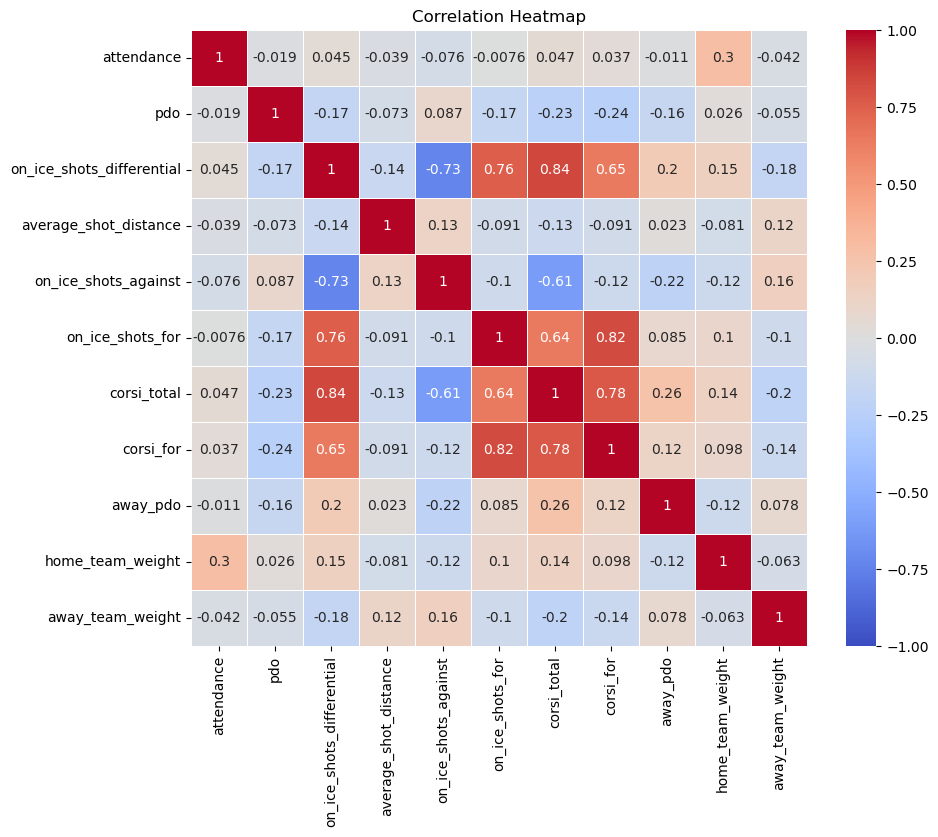

In [97]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_corr, 
            annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=.5,
            square=True)
plt.title('Correlation Heatmap')
plt.show()

In [98]:
#X=X = nhl_df.drop(columns=['home_points', 'away_points', 'game_result','home_team', 'away_team', 'away_fenwick_pct', 'away_corsi_pct', 'fenwick_pct','fenwick_total','fenwick_for','corsi_pct','on_ice_shots_pct','corsi_against','fenwick_against'])

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [100]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [101]:
y_pred = model.predict(X_test)

In [102]:
accuracy

0.9545454545454546

In [103]:
X

,attendance,pdo,on_ice_shots_differential,average_shot_distance,on_ice_shots_against,on_ice_shots_for,corsi_total,corsi_for,away_pdo,home_team_weight,away_team_weight
0,18006.0,8.662,3.0,30.9,18.0,21.0,10.0,43.0,4.723,8.0,5.0
1,18230.0,10.922,-16.0,43.3,44.0,28.0,-22.0,50.0,8.700,5.0,6.0
2,18824.0,10.269,6.0,45.8,31.0,37.0,34.0,84.0,4.007,7.0,1.0
3,21105.0,18.306,-8.0,32.1,26.0,18.0,-8.0,41.0,10.226,1.0,6.0
4,18573.0,6.533,5.0,38.7,22.0,27.0,10.0,52.0,17.643,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
878,16127.0,4.233,-17.0,37.3,38.0,21.0,-12.0,47.0,17.666,2.0,8.0
879,11271.0,0.895,-5.0,29.2,31.0,26.0,-6.0,45.0,11.500,3.0,5.0
880,13362.0,0.917,2.0,32.4,22.0,24.0,18.0,51.0,9.300,2.0,5.0
881,21105.0,0.902,-14.0,38.1,31.0,17.0,-1.0,47.0,10.800,1.0,4.0


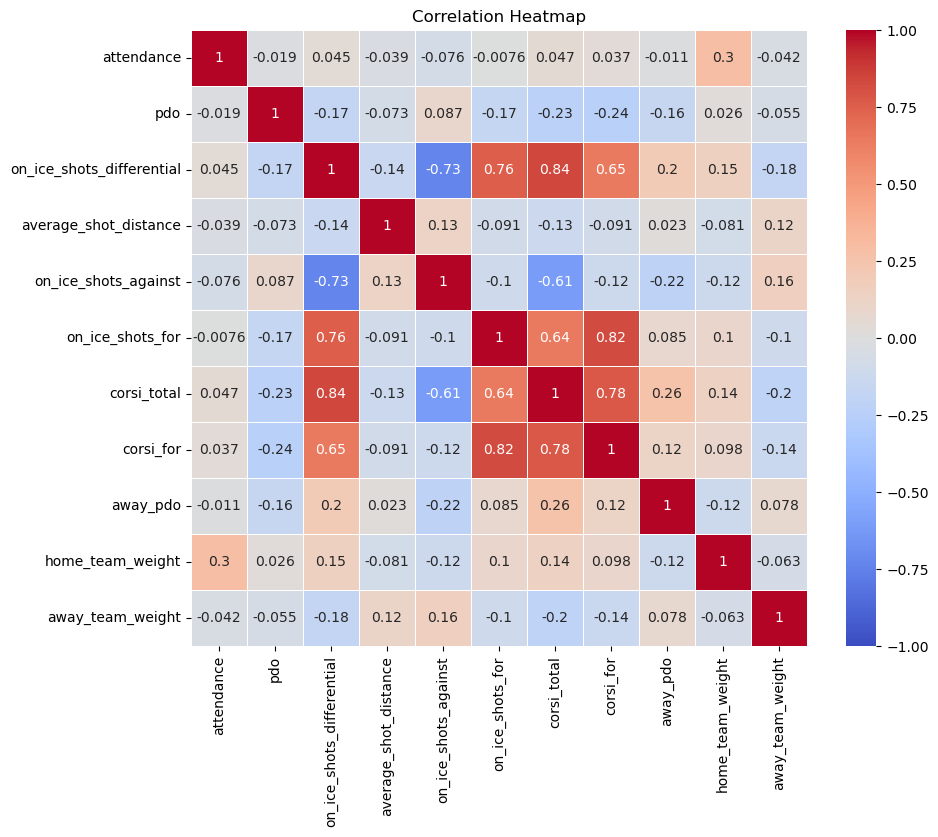

In [104]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_corr, 
            annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=.5,
            square=True)
plt.title('Correlation Heatmap')
plt.show()

In [105]:
cross_val_score(model, X, y, cv=5)

NameError: name 'cross_val_score' is not defined

In [ ]:
model.score(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test, y_pred)

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [107]:
X = nhl_df.drop(columns=['home_points', 'away_points', 'game_result','home_team', 'away_team', 'away_fenwick_pct', 'away_corsi_pct', 'fenwick_pct','fenwick_total','fenwick_for','corsi_pct','on_ice_shots_pct','corsi_against','fenwick_against','pdo','away_pdo'], axis=1)
y = nhl_df['game_result']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
k_values = range(1, 99)

mean_scores = []
std_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    
    mean_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

mean_scores = np.abs(mean_scores)

NameError: name 'cross_val_score' is not defined

ValueError: x and y must have same first dimension, but have shapes (98,) and (0,)

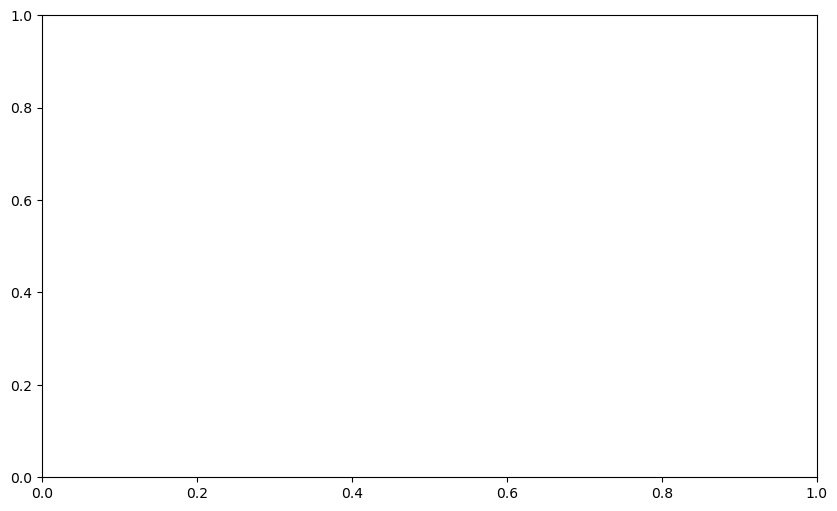

In [111]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o')
plt.fill_between(k_values, np.abs(mean_scores - std_scores), np.abs(mean_scores + std_scores), alpha=0.1)
plt.title('KNN Mean Squared Error for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('MSE (Lower is Better)')
plt.xticks(k_values)
plt.show()

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=22)
knn_classifier.fit(X_train_scaled, y_train)

y_pred_knn = knn_classifier.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f'KNN Accuracy: {accuracy_knn}, F1 Score: {f1_knn}')

In [112]:
from sklearn.metrics import r2_score

In [113]:
r2_score(y_test, y_pred_knn)

0.5636173822262821

In [114]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

y_pred_rf = rf_classifier.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}, F1 Score: {f1_rf}')

Random Forest Accuracy: 0.7215909090909091, F1 Score: 0.6878980891719746


In [115]:
accuracy #logistic regression

0.9545454545454546

In [116]:
print(X.columns)

Index(['attendance', 'on_ice_shots_differential', 'average_shot_distance',
       'on_ice_shots_against', 'on_ice_shots_for', 'corsi_total', 'corsi_for',
       'home_team_weight', 'away_team_weight'],
      dtype='object')


In [117]:
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index = X.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)

                           Importance
average_shot_distance        0.165345
attendance                   0.137253
corsi_total                  0.116358
on_ice_shots_against         0.111108
on_ice_shots_differential    0.109528
corsi_for                    0.106810
on_ice_shots_for             0.093042
away_team_weight             0.085588
home_team_weight             0.074968


In [69]:
import pickle

In [70]:
with open('rf_classifier.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

In [71]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [73]:
X

,attendance,on_ice_shots_differential,average_shot_distance,on_ice_shots_against,on_ice_shots_for,corsi_total,corsi_for,home_team_weight,away_team_weight
0,18006.0,3.0,30.9,18.0,21.0,10.0,43.0,8.0,5.0
1,18230.0,-16.0,43.3,44.0,28.0,-22.0,50.0,5.0,6.0
2,18824.0,6.0,45.8,31.0,37.0,34.0,84.0,7.0,1.0
3,21105.0,-8.0,32.1,26.0,18.0,-8.0,41.0,1.0,6.0
4,18573.0,5.0,38.7,22.0,27.0,10.0,52.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...
878,16127.0,-17.0,37.3,38.0,21.0,-12.0,47.0,2.0,8.0
879,11271.0,-5.0,29.2,31.0,26.0,-6.0,45.0,3.0,5.0
880,13362.0,2.0,32.4,22.0,24.0,18.0,51.0,2.0,5.0
881,21105.0,-14.0,38.1,31.0,17.0,-1.0,47.0,1.0,4.0
